<a href="https://colab.research.google.com/github/pitaconsumer/data-sets/blob/main/Civil_Liberty_Project_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Libraries Using --may need geopandas for locations
import pandas as pd
import numpy as np
import collections
from collections import Counter
from collections import OrderedDict

import datetime
import missingno as msno # Import missingno
import matplotlib.pyplot as plt
import statistics
import scipy as sp


In [ ]:
df_ny = pd.read_csv('C:/Users/mehr.qayyum/Downloads/Crime Data)-20221128T153818Z-001 (1)/2016-2022 Crime Data (USC FOIA Responses-Crime Data)/New York/NY Arrest Data/NYPD_Arrest_Data__Year_to_Date_10_19_22.csv')
df_ny

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,1/9/2022,NaN,(null),NaN,(null),PL 2650022,M,B,49,0,25-44,M,BLACK HISPANIC,1021536,251417,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,1/31/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
2,239651234,1/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
3,241524225,3/3/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
4,241038267,2/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140559,251412120,9/21/2022,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,B,41,0,25-44,M,WHITE HISPANIC,1013096,236605,40.816057,-73.895785,POINT (-73.895785 40.816057)
140560,249578318,8/15/2022,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,70,0,25-44,M,BLACK,991549,169019,40.630600,-73.973705,POINT (-73.9737053160275 40.6305998504358)
140561,247641284,7/6/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,78,0,45-64,M,BLACK,990420,188642,40.684454,-73.977750,POINT (-73.97775 40.684454)
140562,251006627,9/13/2022,508.0,"DRUG PARAPHERNALIA, POSSESSE",235.0,DANGEROUS DRUGS,PL 2205001,M,B,43,0,25-44,F,BLACK,1019464,241704,40.830027,-73.872754,POINT (-73.87275417 40.83002685)


In [ ]:
# summary stats
df_ny.describe() #might be helpful for coordinates for location 

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.405640e+05,140188.000000,140185.000000,140564.000000,140564.000000,1.405640e+05,140564.000000,140564.000000,140564.000000
mean,2.452998e+08,402.338010,246.521825,62.844000,0.952015,1.005070e+06,208548.587796,40.739047,-73.924840
std,3.795695e+06,270.372668,150.365695,35.040289,8.029384,2.120105e+04,29572.000950,0.081172,0.076462
min,2.384924e+08,15.000000,101.000000,1.000000,0.000000,9.140310e+05,121545.000000,40.500044,-74.252525
25%,2.421197e+08,113.000000,110.000000,40.000000,0.000000,9.911500e+05,186602.000000,40.678800,-73.975136
50%,2.452815e+08,339.000000,235.000000,62.000000,0.000000,1.005028e+06,207135.000000,40.735196,-73.924942
75%,2.484798e+08,681.000000,344.000000,100.000000,0.000000,1.017119e+06,236070.000000,40.814603,-73.881509
max,2.518695e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,-73.700717


In [ ]:
#columns needed?
df_ny.columns
#Can use geopandas for visual map

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
df_ny['ARREST_DATE'] #all from year 2022

0          1/9/2022
1         1/31/2022
2         1/25/2022
3          3/3/2022
4         2/22/2022
            ...    
140559    9/21/2022
140560    8/15/2022
140561     7/6/2022
140562    9/13/2022
140563    7/16/2022
Name: ARREST_DATE, Length: 140564, dtype: object

### Note on NY Penal Codes
* Mehr - the recap below also has the different penal codes/laws for human trafficking and prostitution in New York that we requested but have not received from them yet. 
* Below is an example of the laws in NY we requested information for (but have not yet received)
•	§ 230.34 Sex trafficking

•	§ 230.34-a Sex trafficking of a child

•	§ 135.35 Labor trafficking

•	§ 230.33 Compelling prostitution

•	§ 230.15 Promoting prostitution

•	§ 230.35 Promoting or compelling prostitution;  accomplice

•	§ 230.36 Sex trafficking;  accomplice

•	§ 230.40 Permitting prostitution

•	 § 230.20 Promoting prostitution in the fourth degree

* NY PENAL § 230.25 Promoting prostitution in the third degree
* NY PENAL § 230.30 Promoting prostitution in the second degree
* NY PENAL § 230.32 Promoting prostitution in the first degree


In [ ]:
#Descripition column
df_ny['OFNS_DESC'].value_counts()  #similar to 'PD_DESC'

ASSAULT 3 & RELATED OFFENSES      23188
PETIT LARCENY                     15288
FELONY ASSAULT                    14190
MISCELLANEOUS PENAL LAW            9327
CRIMINAL MISCHIEF & RELATED OF     7717
                                  ...  
NEW YORK CITY HEALTH CODE             2
PARKING OFFENSES                      2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
ADMINISTRATIVE CODES                  1
DISRUPTION OF A RELIGIOUS SERV        1
Name: OFNS_DESC, Length: 65, dtype: int64

In [ ]:
#legal codes
df_ny['LAW_CODE']  

0         PL 2650022
1         CPL5700600
2         PL 1302503
3         PL 1303501
4         PL 1303501
             ...    
140559    PL 1211100
140560    PL 1211200
140561    PL 1552500
140562    PL 2205001
140563    VTL05110FE
Name: LAW_CODE, Length: 140564, dtype: object

In [ ]:
#map to 'LAW_CODE'
df_ny['LAW_CAT_CD']

0         M
1         9
2         F
3         F
4         F
         ..
140559    M
140560    F
140561    M
140562    M
140563    F
Name: LAW_CAT_CD, Length: 140564, dtype: object

In [ ]:
#See all Column OFNS_DESC description
df_ny['OFNS_DESC'].unique()

array(['(null)', 'RAPE', 'SEX CRIMES', 'ESCAPE 3', 'JOSTLING', 'ARSON',
       'INTOXICATED & IMPAIRED DRIVING', 'DANGEROUS WEAPONS',
       'ASSAULT 3 & RELATED OFFENSES', 'MISCELLANEOUS PENAL LAW',
       'VEHICLE AND TRAFFIC LAWS', 'OTHER TRAFFIC INFRACTION',
       'FELONY ASSAULT', 'PETIT LARCENY', 'GRAND LARCENY',
       'DANGEROUS DRUGS', 'CRIMINAL MISCHIEF & RELATED OF',
       'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES INVOLVING FRAUD',
       'ROBBERY', 'UNAUTHORIZED USE OF A VEHICLE', 'FORGERY',
       'FOR OTHER AUTHORITIES', 'OTHER OFFENSES RELATED TO THEF',
       'BURGLARY', 'POSSESSION OF STOLEN PROPERTY',
       'OFFENSES AGAINST PUBLIC ADMINI', 'INTOXICATED/IMPAIRED DRIVING',
       'CANNABIS RELATED OFFENSES', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OTHER STATE LAWS (NON PENAL LA',
       'DISORDERLY CONDUCT', 'CRIMINAL TRESPASS',
       'OFFENSES AGAINST THE PERSON', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'OTHER STATE LAWS', 'PR

In [ ]:
#Check description of offenses
df_ny['PD_DESC'].value_counts()

ASSAULT 3                           16877
LARCENY,PETIT FROM OPEN AREAS,      15230
ASSAULT 2,1,UNCLASSIFIED            10476
ROBBERY,OPEN AREA UNCLASSIFIED       7270
PUBLIC ADMINISTRATION,UNCLASSI       6439
                                    ...  
POSS METH MANUFACT MATERIAL             1
RECORDS,FALSIFY-TAMPER                  1
USE CHILD TO COMMIT CONT SUB OFF        1
SPILLBACK                               1
CANNABIS SALE, AGGRAVATED               1
Name: PD_DESC, Length: 235, dtype: int64

In [ ]:
#See all Column PD description
df_ny['PD_DESC'].unique()

#of interest for target

array(['(null)', 'RAPE 3', 'RAPE 1', 'SEXUAL ABUSE 3,2', 'ESCAPE 3',
       'JOSTLING', 'ARSON 2,3,4', 'SEXUAL ABUSE', 'RAPE 2',
       'INTOXICATED DRIVING,ALCOHOL', 'CRIMINAL POSSESSION WEAPON',
       'MENACING,UNCLASSIFIED', 'PUBLIC ADMINISTRATION,UNCLASSI',
       'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'TRAFFIC,UNCLASSIFIED INFRACTIO',
       'ASSAULT 2,1,UNCLASSIFIED', 'LARCENY,PETIT FROM OPEN AREAS,',
       'WEAPONS POSSESSION 3',
       'LARCENY,GRAND FROM OPEN AREAS, UNATTENDED', 'STRANGULATION 1ST',
       'CONTROLLED SUBSTANCE, POSSESSI', 'CRIMINAL MISCHIEF 4TH, GRAFFIT',
       'AGGRAVATED HARASSMENT 2', 'ASSAULT 3', 'FORGERY,ETC.-MISD.',
       'CRIMINAL MIS 2 & 3', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'UNAUTHORIZED USE VEHICLE 3', 'FORGERY,ETC.,UNCLASSIFIED-FELO',
       'U.S. CODE UNCLASSIFIED', 'THEFT OF SERVICES, UNCLASSIFIE',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'WEAPONS, POSSESSION, ETC',
       'LEWDNESS,PUBLIC', 'STOLEN PROPERTY 3,POSSESSION',
       'CONTROLLED

In [ ]:
### Note: Subset df for these descriptions:
'RAPE 3',
 'RAPE 1',
 'SEXUAL ABUSE 3,2',
 'SEXUAL ABUSE', 'RAPE 2',
'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'TRAFFIC,UNCLASSIFIED INFRACTIO',
'PROSTITUTION','PROSTITUTION 4,PROMOTING&SECUR',
'PROMOTING A SEXUAL PERFORMANCE', 'SEX CRIMES',
'PROSTITUTION 3,PROMOTING BUSIN',
'SEX TRAFFICKING',
'USE OF A CHILD IN A SEXUAL PER', 'USE CHILD TO COMMIT CONT SUB OFF', 
'CONSPIRACY 6, 5', [https://www.nycourts.gov/judges/cji/2-PenalLaw/105/105-05%282%29.pdf]
'PROSTITUTION, PATRONIZING 4, 3', 'FORCIBLE TOUCHING',
       'LURING A CHILD', 
    'PROSTITUTION 3, PROMOTING UNDE', 
    'AGGRAVATED SEXUAL ASBUSE', 
'KIDNAPPING 1', 'SOLICITATION 4, CRIMINAL',
'PROSTITUTION,PERMITTING', 'PROSTITUTION 1, UNDER 11',

In [ ]:
df_ny['PD_DESC'].nlargest

<bound method Series.nlargest of 0                                 (null)
1                                 (null)
2                                 RAPE 3
3                                 RAPE 1
4                                 RAPE 1
                       ...              
140559               OBSTR BREATH/CIRCUL
140560                 STRANGULATION 1ST
140561    LARCENY,PETIT FROM OPEN AREAS,
140562    DRUG PARAPHERNALIA,   POSSESSE
140563    NY STATE LAWS,UNCLASSIFIED FEL
Name: PD_DESC, Length: 140564, dtype: object>

In [ ]:
#Check description of offenses
count_offense = df_ny['PD_DESC'].value_counts().to_list()
count_offense

[16877,
 15230,
 10476,
 7270,
 6439,
 5554,
 4397,
 4244,
 4052,
 3670,
 3624,
 3600,
 3057,
 2806,
 2730,
 2650,
 2543,
 2259,
 2020,
 2012,
 1994,
 1781,
 1752,
 1487,
 1200,
 1156,
 1093,
 1073,
 1064,
 992,
 953,
 950,
 896,
 892,
 782,
 742,
 697,
 693,
 682,
 649,
 639,
 542,
 524,
 497,
 497,
 487,
 446,
 435,
 379,
 379,
 360,
 339,
 303,
 292,
 287,
 245,
 244,
 219,
 212,
 209,
 209,
 203,
 188,
 186,
 179,
 154,
 154,
 151,
 150,
 146,
 143,
 133,
 131,
 116,
 108,
 104,
 104,
 99,
 97,
 95,
 95,
 93,
 93,
 92,
 92,
 91,
 84,
 78,
 77,
 74,
 68,
 68,
 64,
 62,
 59,
 58,
 58,
 58,
 57,
 57,
 57,
 53,
 52,
 49,
 44,
 42,
 42,
 41,
 41,
 40,
 39,
 37,
 34,
 33,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 23,
 23,
 21,
 21,
 19,
 19,
 19,
 16,
 16,
 16,
 16,
 15,
 13,
 13,
 13,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,

### Top Offenses
ASSAULT 3                           16877
LARCENY,PETIT FROM OPEN AREAS,      15230
ASSAULT 2,1,UNCLASSIFIED            10476

In [ ]:
#itemize
count_offenses = [[count_offense.count(item), item] for item in set(count_offense)]
count_offenses

[[23, 1],
 [16, 2],
 [12, 3],
 [6, 4],
 [7, 5],
 [2, 6],
 [4, 7],
 [7, 8],
 [6, 9],
 [3, 10],
 [4, 11],
 [1, 524],
 [3, 13],
 [2, 12],
 [1, 15],
 [1, 3600],
 [4, 16],
 [3, 19],
 [2, 21],
 [4, 23],
 [1, 25],
 [1, 26],
 [2, 27],
 [1, 28],
 [1, 29],
 [1, 542],
 [1, 31],
 [3, 32],
 [2, 33],
 [1, 34],
 [1, 30],
 [1, 37],
 [1, 39],
 [1, 3624],
 [1, 1064],
 [2, 42],
 [2, 41],
 [1, 44],
 [1, 40],
 [1, 1073],
 [1, 49],
 [1, 52],
 [1, 53],
 [3, 57],
 [3, 58],
 [1, 59],
 [1, 62],
 [1, 64],
 [2, 68],
 [1, 1093],
 [1, 74],
 [1, 77],
 [1, 78],
 [1, 84],
 [1, 3670],
 [1, 2650],
 [1, 91],
 [2, 92],
 [2, 93],
 [2, 95],
 [1, 97],
 [1, 99],
 [1, 7270],
 [2, 104],
 [1, 108],
 [1, 116],
 [1, 639],
 [1, 131],
 [1, 1156],
 [1, 133],
 [1, 649],
 [1, 143],
 [1, 146],
 [1, 4244],
 [1, 150],
 [1, 151],
 [2, 154],
 [1, 2730],
 [1, 682],
 [1, 1200],
 [1, 179],
 [1, 693],
 [1, 697],
 [1, 186],
 [1, 188],
 [1, 203],
 [2, 209],
 [1, 2259],
 [1, 212],
 [1, 1752],
 [1, 219],
 [1, 742],
 [1, 10476],
 [1, 244],
 [1, 1781

In [ ]:
[print(count_offense.count(item), item) for item in set(count_offense)]

23 1
16 2
12 3
6 4
7 5
2 6
4 7
7 8
6 9
3 10
4 11
1 524
3 13
2 12
1 15
1 3600
4 16
3 19
2 21
4 23
1 25
1 26
2 27
1 28
1 29
1 542
1 31
3 32
2 33
1 34
1 30
1 37
1 39
1 3624
1 1064
2 42
2 41
1 44
1 40
1 1073
1 49
1 52
1 53
3 57
3 58
1 59
1 62
1 64
2 68
1 1093
1 74
1 77
1 78
1 84
1 3670
1 2650
1 91
2 92
2 93
2 95
1 97
1 99
1 7270
2 104
1 108
1 116
1 639
1 131
1 1156
1 133
1 649
1 143
1 146
1 4244
1 150
1 151
2 154
1 2730
1 682
1 1200
1 179
1 693
1 697
1 186
1 188
1 203
2 209
1 2259
1 212
1 1752
1 219
1 742
1 10476
1 244
1 1781
1 2806
1 245
1 782
1 287
1 292
1 6439
1 4397
1 303
1 339
1 360
2 379
1 892
1 15230
1 896
1 5554
1 435
1 950
1 953
1 446
1 1994
1 1487
1 4052
1 2012
1 992
1 2020
1 487
1 16877
1 2543
1 3057
2 497


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
#Count Plot of offenses

In [ ]:
#Filter DF for human traffick related offenses
df_ny['sex_crimes'] = df_ny['PD_DESC'].isin(['RAPE 3',
 'RAPE 1',
 'SEXUAL ABUSE 3,2',
 'SEXUAL ABUSE', 'RAPE 2',
'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'TRAFFIC,UNCLASSIFIED INFRACTIO',
'PROSTITUTION','PROSTITUTION 4,PROMOTING&SECUR',
'PROMOTING A SEXUAL PERFORMANCE', 'SEX CRIMES',
'PROSTITUTION 3,PROMOTING BUSIN',
'SEX TRAFFICKING',
'USE OF A CHILD IN A SEXUAL PER', 'USE CHILD TO COMMIT CONT SUB OFF', 
'CONSPIRACY 6, 5',
'PROSTITUTION, PATRONIZING 4, 3', 'FORCIBLE TOUCHING',
       'LURING A CHILD', 
    'PROSTITUTION 3, PROMOTING UNDE', 
    'AGGRAVATED SEXUAL ASBUSE', 
'KIDNAPPING 1', 'SOLICITATION 4, CRIMINAL',
'PROSTITUTION,PERMITTING', 'PROSTITUTION 1, UNDER 11'])
df_ny['sex_crimes'] 

0         False
1         False
2          True
3          True
4          True
          ...  
140559    False
140560    False
140561    False
140562    False
140563    False
Name: sex_crimes, Length: 140564, dtype: bool

In [ ]:
#check new column
df_ny[sex_crimes].columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'sex_crimes'],
      dtype='object')

In [ ]:
#New DF to cut out records
                #= incident.loc[(incident['State'].isin(['Closed','Resolved']))]
df_ny_filtered_sc = df_ny.loc[(df_ny['PD_DESC'].isin(['RAPE 3',
 'RAPE 1',
 'SEXUAL ABUSE 3,2',
 'SEXUAL ABUSE', 'RAPE 2',
'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'TRAFFIC,UNCLASSIFIED INFRACTIO',
'PROSTITUTION','PROSTITUTION 4,PROMOTING&SECUR',
'PROMOTING A SEXUAL PERFORMANCE', 'SEX CRIMES',
'PROSTITUTION 3,PROMOTING BUSIN',
'SEX TRAFFICKING',
'USE OF A CHILD IN A SEXUAL PER', 'USE CHILD TO COMMIT CONT SUB OFF', 
'CONSPIRACY 6, 5',
'PROSTITUTION, PATRONIZING 4, 3', 'FORCIBLE TOUCHING',
       'LURING A CHILD', 
    'PROSTITUTION 3, PROMOTING UNDE', 
    'AGGRAVATED SEXUAL ASBUSE', 
'KIDNAPPING 1', 'SOLICITATION 4, CRIMINAL',
'PROSTITUTION,PERMITTING', 'PROSTITUTION 1, UNDER 11']))]  ## Filter for selected sex crimes for trafficking

df_ny_filtered_sc

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,sex_crimes
2,239651234,1/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631),True
3,241524225,3/3/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),True
4,241038267,2/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227),True
5,240817075,2/17/2022,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,K,71,0,<18,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631),True
6,241964195,3/11/2022,157.0,RAPE 1,104.0,RAPE,PL 1303504,F,B,49,0,25-44,M,WHITE HISPANIC,1027434,251387,40.856577,-73.843894,POINT (-73.8438936779283 40.8565767275976),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140465,250890494,9/11/2022,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,S,122,0,25-44,M,WHITE HISPANIC,954827,148519,40.574286,-74.105914,POINT (-74.1059144051212 40.5742856881925),True
140525,250490371,9/1/2022,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,7,0,25-44,M,BLACK,987874,199007,40.712904,-73.986928,POINT (-73.98692768 40.7129042),True
140533,249701481,8/17/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,Q,112,0,25-44,M,WHITE,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),True
140537,250155482,8/25/2022,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,BLACK HISPANIC,1017423,265537,40.895449,-73.880011,POINT (-73.88001135 40.89544907),True


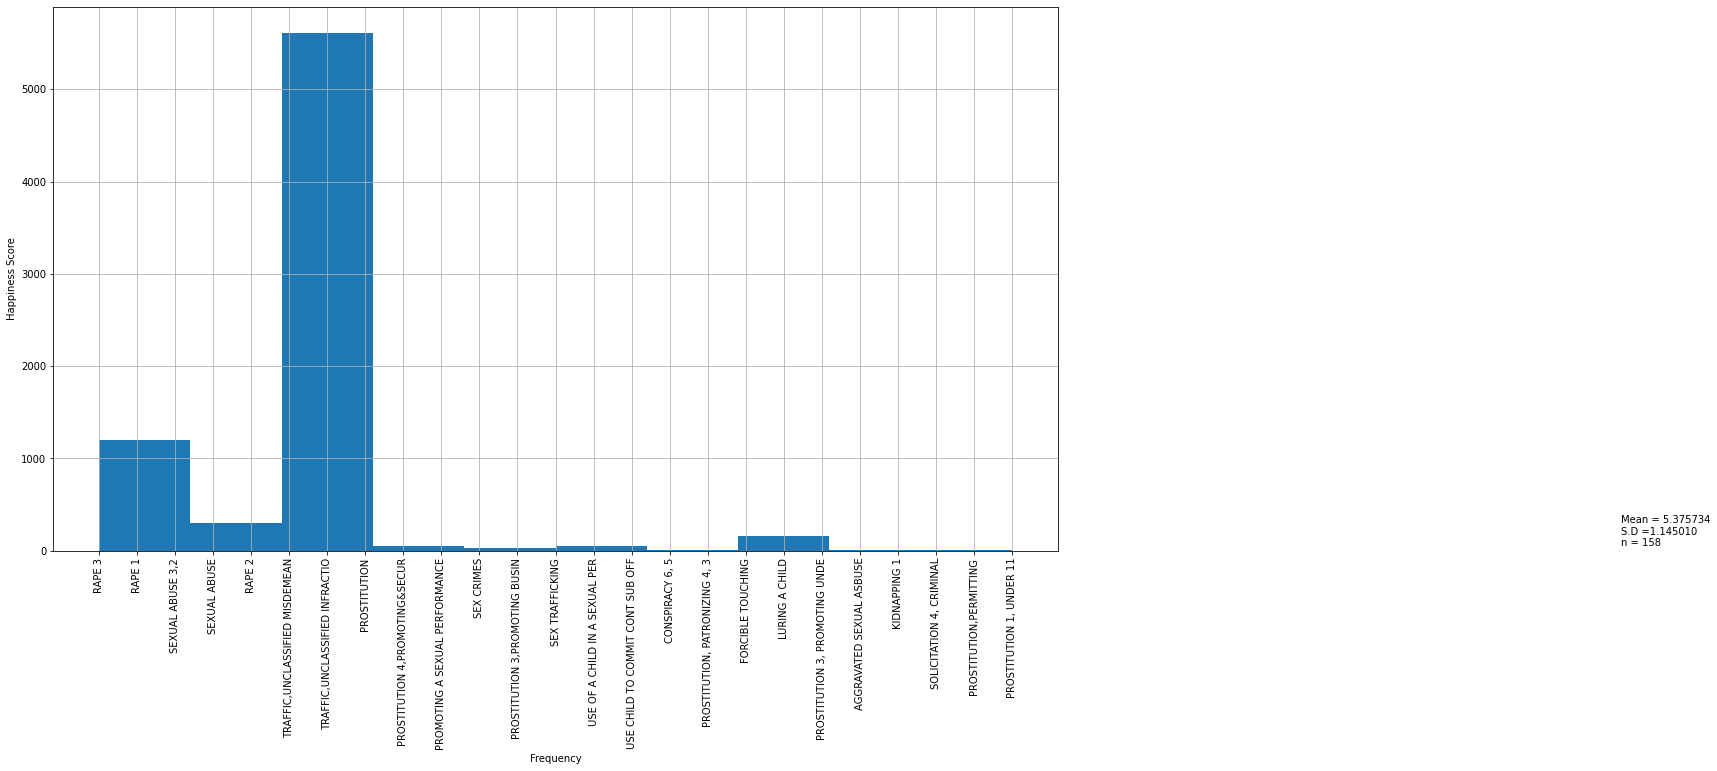

In [ ]:
## Histograms of Related Sex Trafficking Offenses. 
plt.figure(figsize=(18,10))

df_ny_filtered_sc['PD_DESC'].hist()#Count of related sex trafficking offenses is 7410

#rotate labels

plt.xticks(rotation='vertical')
plt.xlabel("Frequency")
plt.ylabel("Happiness Score")
textstr= 'Mean = 5.375734\nS.D =1.145010\nn = 158'
plt.text(40,50, textstr)
#plt.axvline(x=5.375734,color='red',linestyle="dashed", label='mean')  #Plot the "average crime number"
#plt.axvline(x=5.3757348 + 1.145010,color='green',linestyle="solid", label='S.D.')
#plt.axvline(x=5.375734 - 1.145010,color='green',linestyle="solid")
#plt.legend(loc='center right')
plt.show()


In [ ]:
## Contingency Table

In [ ]:
freq_offense = pd.crosstab()

In [ ]:
#Check Historic data   C:\Users\mehr.qayyum\Downloads\Crime Data)-20221128T153818Z-001 (1)\2016-2022 Crime Data (USC FOIA Responses-Crime Data)\New York\NY Arrest Data\NYPD_Arrests_Data__Historic_mq.csv
df_ny_historic = pd.read_csv('C:/Users/mehr.qayyum/Downloads/Crime Data)-20221128T153818Z-001 (1)/2016-2022 Crime Data (USC FOIA Responses-Crime Data)/New York/NY Arrest Data/NYPD_Arrests_Data__Historic_mq.csv')
df_ny_historic

MemoryError: Unable to allocate 16.0 MiB for an array with shape (4, 1048575) and data type object